In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Ecuación de Poisson

La ecuación de Poisson es la ecuación de Laplace no homogenea, es decir

$$\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = f(x,y)$$

Esta ecuación diferencial, al igual que la ecuación de Laplace, es indepensiente del tiempo por lo tanto al momento de discretizar la ecuación no se buscará encontrar el siguiente paso en el tiempo como en el caso de las ecuaciones de transporte. Sin embargo podremos obtener una condición de equilibrio para cada punto dadas las condiciones de frontera y la función de "forzamiento" $f(x,y)$.

La disctretización de la ecuacíon sería

$$\frac{p_{(i+1,j)}+p_{(i-1,j)}-2p_{(i,j)}}{\Delta x^2}+\frac{p_{(i,j+1)}+p_{(i,j-1)}-2p_{(i,j)}}{\Delta y^2}=f_{(i,j)}$$

Por lo tanto la condición de equilibrio es

$$p_{(i,j)} = \frac{\Delta y^2\left(p_{(i+1,j)}+p_{(i-1,j)}\right)+\Delta x^2\left(p_{(i,j+1)}+p_{(i,j-1)}\right) +f_{(i,j)}\Delta x^2\Delta y^2}{2(\Delta x^2 +\Delta y^2)}$$

In [2]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
def plot2D(x, y, p, p_lap, title1, title2, ang):
    fig = figure(figsize=(16,8), dpi=100)
    ax = fig.add_subplot(121,projection='3d')
    bx = fig.add_subplot(122,projection='3d')
    
    X,Y = meshgrid(x,y)
    ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0, antialiased=False)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(title1)
    ax.view_init(30,225)
    
    bx.plot_surface(X, Y, p_lap[:], rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0, antialiased=False)
    bx.set_xlim(0,1)
    bx.set_ylim(0,1)
    bx.set_title(title2)
    bx.view_init(20,ang)

Recordemos que la condición de equilibrio es

$$p_{(i,j)} = \frac{\Delta y^2\left(p_{(i+1,j)}+p_{(i-1,j)}\right)+\Delta x^2\left(p_{(i,j+1)}+p_{(i,j-1)}\right) +f_{(i,j)}\Delta x^2\Delta y^2}{2(\Delta x^2 +\Delta y^2)}$$

In [9]:
def poisson_rec(p0, x, y, dx, dy, epsilon, cond_frontera, f):
    epsilon_temp = 1.
    p = p0.copy()
    pn = empty_like(p0)
    
    while epsilon_temp > epsilon:
        pn = p.copy()
        #Se aplica la condicion de estabilidad en el interior del dominio
        p[1:-1,1:-1] = ( dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1]) + dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2]) +dx**2 *dy**2 *f[1:-1,1:-1] )/(2*(dx**2+dy**2))
        
        #Se aplican las condiciones de frontera
        p = cond_frontera(p, x, y)
        
        #Se calcula la distancia entre la nueva y la vieja funcion para ver la convergencia del metodo
        if sum(abs(pn[:]))<>0:
            epsilon_temp = sum(abs(p[:])-abs(pn[:]))/sum(abs(pn[:]))
    return pn

Resolvamos la ecuación de Poisson en $(0,1)\times(0,1)$ con las siguientes condiciones de frontera:

$$
p(x, 0) = 0\\
p(x, 1) = 0 \\
p(0, y) = 0\\
p(1, y) = 0 
$$
 y donde $f(x,y) = sin(10 \pi x y)$

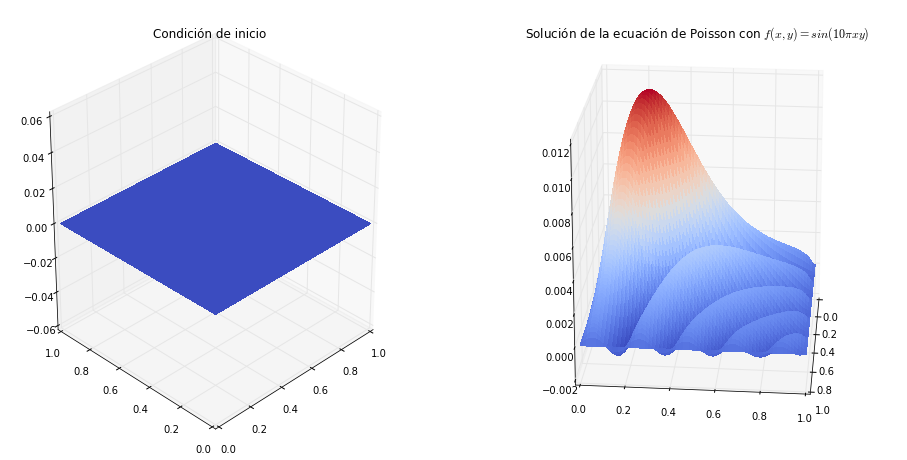

In [32]:
def cond_front(p, x, y):
    p[:, 0] = 0
    p[:, -1] = 0
    p[0,:] = 0
    p[-1,:] = 0
    return p 

nx = 71
ny = 71
dx = 1./(nx-1)
dy = 1./(ny-1)

x = linspace(0, 1, nx)
y = linspace(0, 1, ny)
X, Y = meshgrid(x, y)

#Se define un arreglo de puros ceros
p0 = zeros((nx, ny))

#Se imponen las condiciones de frontera
p0 = cond_front(p0, x, y)
#Se calcula el forzamiento
f = sin(10*pi*X*Y)

#Se calcula la solucion de la ecuacion de poisson
Psol = poisson_rec(p0, x, y, dx, dy, 1.0e-7, cond_front, f)
plot2D(x, y, p0, Psol, u'Condición de inicio', u'Solución de la ecuación de Poisson con $f(x,y) = sin(10 \pi x y)$', 5)

Resolvamos la ecuación de Poisson en $(0,1)\times(0,1)$ con las siguientes condiciones de frontera:

$$
p(x, 0) = 0\\
p(x, 1) = 0\\
p(0, y) = 0\\
p(1, y) = 0 
$$
 y donde $f(x,y) = \delta(x)\delta(y)$

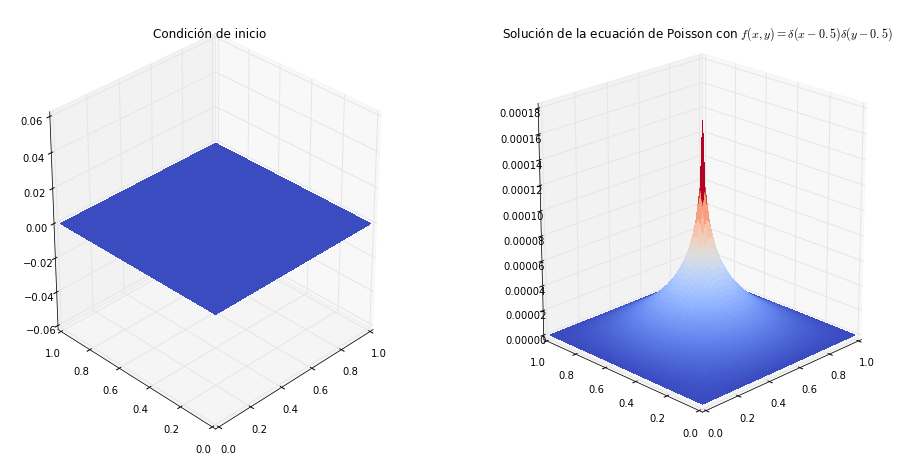

In [37]:
def cond_front(p, x, y):
    p[:, 0] = 0
    p[:, -1] = 0
    p[0,:] = 0
    p[-1,:] = 0
    return p 

nx = 71
ny = 71
dx = 1./(nx-1)
dy = 1./(ny-1)

x = linspace(0, 1, nx)
y = linspace(0, 1, ny)
X, Y = meshgrid(x, y)

#Se define un arreglo de puros ceros
p0 = zeros((nx, ny))

#Se imponen las condiciones de frontera
p0 = cond_front(p0, x, y)
#Se calcula el forzamiento
f = zeros((nx,ny))
f[nx/2][ny/2] = 1

#Se calcula la solucion de la ecuacion de poisson
Psol = poisson_rec(p0, x, y, dx, dy, 1.0e-7, cond_front, f)
plot2D(x, y, p0, Psol, u'Condición de inicio', u'Solución de la ecuación de Poisson con $f(x,y) =  \delta(x-0.5)\delta(y-0.5)$',  225)